<a href="https://colab.research.google.com/github/Engr-Usman-Ali/Data_Cleaning_And_Preprocessing_Task/blob/main/Data_Cleaning_And_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [95]:
!git clone https://github.com/Engr-Usman-Ali/Data_Cleaning_And_Preprocessing_Task.git

fatal: destination path 'Data_Cleaning_And_Preprocessing_Task' already exists and is not an empty directory.


In [96]:
#Load Dataset
df = pd.read_csv("/content/Data_Cleaning_And_Preprocessing_Task/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Handle Missing Values**

In [97]:
# Handle Missing Values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


# Decision:
- Fill 'country' missing values with mode.
- Drop rows with missing 'date_added' or 'rating'.
- Keep 'director' column intact (no deletion), but we can leave its NaN values for now or optionally fill with 'Unknown'

In [ ]:
# Fill 'country' missing values with mode
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Optional: Fill missing 'director' with 'Unknown' (keeping the column)
df['director'].fillna('Unknown', inplace=True)

# Drop rows where 'date_added' or 'rating' is missing
df.dropna(subset=['date_added', 'rating'], inplace=True)

# Confirm missing values handled
print(df.isnull().sum())

# **Identify & Remove Duplicates**

In [99]:
# Check duplicates
print(f"Duplicate records: {df.duplicated().sum()}")

# Remove duplicates
df.drop_duplicates(inplace=True)

Duplicate records: 0


# **Detect & Handle Outliers**

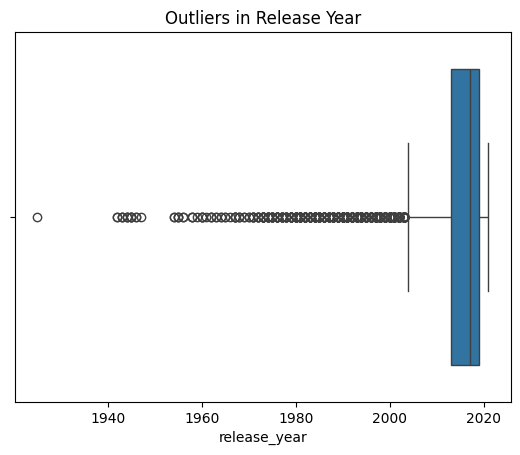

,release_year
count,8793.000000
mean,2014.183100
std,8.824128
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [100]:
# We'll use 'release_year' as a numerical feature to check for outliers

# Visualize outliers with seaborn boxplot
sns.boxplot(x=df['release_year'])
plt.title("Outliers in Release Year")
plt.show()

# Decision: Remove rows with 'release_year' < 1900 or > 2025
df = df[(df['release_year'] >= 1900) & (df['release_year'] <= 2025)]
df['release_year'].describe()



# **Encode Categorical Variables**

In [101]:
# For 'type' column (Movie / TV Show) — use Label Encoding (0,1)
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

# One-hot encode 'rating' column
df = pd.get_dummies(df, columns=['rating'], prefix='rating')

# **Normalize / Standardize Numerical Features**

In [102]:
# 5️ Normalize / Standardize Numerical Features
# 'release_year' — apply StandardScaler for standardization

scaler = StandardScaler()
df['release_year_scaled'] = scaler.fit_transform(df[['release_year']])

# Check basic statistics of 'release_year_scaled' after standardization
print(df['release_year_scaled'].describe())

# Final check
print(df.head())
print(df.info())


count    8.793000e+03
mean     3.555542e-15
std      1.000057e+00
min     -1.010731e+01
25%     -1.340832e-01
50%      3.192451e-01
75%      5.459093e-01
max      7.725735e-01
Name: release_year_scaled, dtype: float64
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                                NaN  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...  